In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
res = pd.read_csv("./../result_mpi_polus.csv", sep=';')

In [9]:
res

,Time,Nthreads,RunType,Size
0,1.22085,1,normal,10000
1,1.46875,2,normal,10000
2,1.71539,8,normal,10000
3,1.95491,4,normal,10000
4,2.13213,16,normal,10000
...,...,...,...,...
75,18.97690,16,problem,25000
76,2.99221,16,problem,10000
77,16.28460,16,problem,25000
78,3.54298,16,problem,10000


In [10]:
p = res[res.RunType == 'problem'].drop(['RunType'], axis=1)

In [11]:
n = res[res.RunType == 'normal'].drop(['RunType'], axis=1)

In [12]:
p = p.groupby(['Size', 'Nthreads']).mean().reset_index()
p

,Size,Nthreads,Time
0,10000,1,1.058165
1,10000,2,1.277033
2,10000,4,1.783977
3,10000,8,2.492485
4,10000,16,3.170905
5,25000,1,6.649382
6,25000,2,7.897527
7,25000,4,10.453233
8,25000,8,13.227700
9,25000,16,18.709000


In [14]:
n = n.groupby(['Size', 'Nthreads']).mean().reset_index()
n

,Size,Nthreads,Time
0,10000,1,1.766485
1,10000,2,1.444425
2,10000,4,2.541752
3,10000,8,1.573180
4,10000,16,2.374008
5,25000,1,7.144778
6,25000,2,17.877028
7,25000,4,23.048908
8,25000,8,19.177657
9,25000,16,14.981650


AttributeError: module 'seaborn' has no attribute 'show'

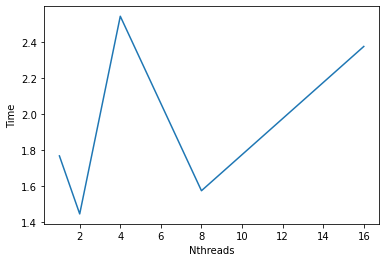

In [16]:
for size in n.Size.unique():
    sns.lineplot(data=n[n.Size == size], x='Nthreads', y='Time')
    sns.show()



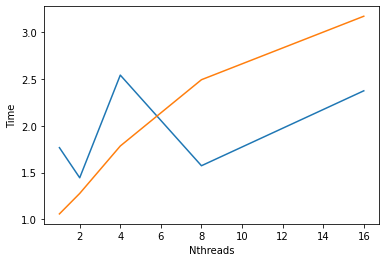

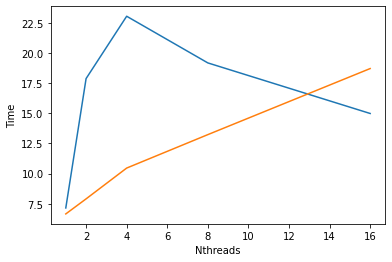

In [17]:
#fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 4*3))

# Loop over each column in the DataFrame
for i, size in enumerate(n.Size.unique()):
    
    # Select the data for the current column
    data = n[n.Size == size]
    data2 = p[p.Size == size]
    
    
    # Plot the data on the corresponding subplot
    sns.lineplot(data=data, x='Nthreads', y='Time')
    sns.lineplot(data=data2, x='Nthreads', y='Time')
    plt.show()
    #axes[i].set_title(column)

In [18]:
res = n.merge(p, left_on=['Nthreads', 'Size'], right_on=['Nthreads', 'Size'])

In [20]:
res.columns = ['Size', 'Nthreads', 'Time_Normal', 'Time_Problem']

In [21]:
res['diff'] = res.Time_Problem - res.Time_Normal

In [22]:
res#.groupby(['MatrixSize']).expanding().min()

,Size,Nthreads,Time_Normal,Time_Problem,diff
0,10000,1,1.766485,1.058165,-0.708320
1,10000,2,1.444425,1.277033,-0.167393
2,10000,4,2.541752,1.783977,-0.757775
3,10000,8,1.573180,2.492485,0.919305
4,10000,16,2.374008,3.170905,0.796898
5,25000,1,7.144778,6.649382,-0.495395
6,25000,2,17.877028,7.897527,-9.979500
7,25000,4,23.048908,10.453233,-12.595675
8,25000,8,19.177657,13.227700,-5.949957
9,25000,16,14.981650,18.709000,3.727350


In [54]:
res['Efficiency_With'] = res.Time_With / res.Nthreads
res['Efficiency_Without'] = res.Time_Without / res.Nthreads

In [23]:
res.to_csv("./res_table.csv")

In [ ]:
res